# TensorFlow 小试牛刀
    1. session使用
    2. 常数constant, 乘法multiply, 加法add, 可视化工具tf.summary.FileWriter
    
-----------------------------------------------------------------------------------------------------------------------------------------------------

### 1. session使用
    会话 : 
            调用: sess = tf.Session() 
            启动: sess.run()
            关闭: sess.close()
            
    或者使用如下形式, 可以不用另外使用sess.close()进行关闭:
            with tf.Session() as sess:
                sess.run(...)   ##括号内为tensor
            

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = tf.random_normal([2,20]) #随机产生2x20维的tensor张量
sess  = tf.Session() 
out = sess.run(a)
print(a) 
print(out)
sess.close()

Tensor("random_normal:0", shape=(2, 20), dtype=float32)
[[-0.44194826 -0.69062221 -1.38514638  1.35509837  1.5880152  -0.01195896
  -0.21715364  1.51109362  0.32536829 -1.35909438  0.47363374  0.21805836
   0.55667102  0.84446079 -1.07626045 -0.16034676  1.12530196 -0.80734658
  -0.60939163  0.75749528]
 [ 0.59666723 -0.24685246 -1.03566301  0.58662283  0.8727079   1.72093737
  -1.47898889 -0.14362469  0.73771977  0.04809504 -0.12160656 -1.57010686
   0.8658672  -0.18975741 -0.03212225  0.92759395  0.64971507 -2.19058585
   0.4732267   0.37987658]]


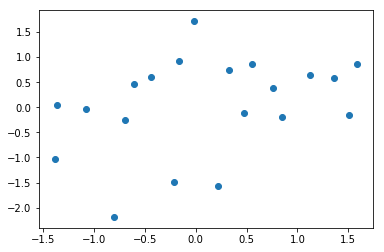

In [3]:
x,y = out
plt.scatter(x,y)
plt.show()

#### Session的等价写法

In [4]:
b = tf.random_normal([2,20]) 
with tf.Session() as sess:
    out = sess.run(b)
    print (out)

[[ 0.45866558  0.16522816  0.84103763  0.7617386   0.83391905 -0.80494148
  -0.83062983 -1.19277108 -0.62553447 -0.95554203  1.05522215  0.45004931
   0.83747202  0.00598125  1.4811939   0.20479389 -0.53695697  1.63914824
  -2.13074851  0.45936671]
 [-0.67038459  2.23267555  0.18150041 -1.1033591   0.2508947   0.19371192
  -0.43355298 -0.46202385 -1.38320267  0.32009089  2.1378293   0.33513761
  -2.38431144 -0.90440905  0.88159537  0.64856011 -0.73169905  0.22551993
  -1.29408062  1.16958308]]


In [5]:
c = tf.random_normal([2,20]) 
sess = tf.Session()
with sess.as_default():
    # result为某个张量
    print(c.eval())

[[ 0.58962572 -0.31298393 -0.33825696 -1.50044346  1.48150253 -1.08743799
  -0.47779444 -0.53380722  0.49587592  1.6595366  -0.42086995 -0.98877585
  -0.68440521 -0.0908001  -0.54369539 -2.31095791 -1.21243465  0.37386793
   1.45006263 -1.2147094 ]
 [ 0.24410297 -0.08238787 -1.86518097  0.60503739  0.67257732 -1.41897798
   0.50170225 -0.88887167 -0.14003719  0.12300343  0.16976215  0.83844566
  -0.13078891 -0.99352956 -0.08564102  1.8068459   0.10916346 -1.45256114
  -1.37433445 -0.58696252]]


In [6]:
sess  = tf.Session() 
print(c.eval(session=sess))   

[[ 0.19696094 -1.25687349  1.40715075 -0.50930566  1.28141022  0.35903531
   0.62599915  0.70909023 -2.01307654  0.62706971 -2.61976957  0.1736732
   1.36611021 -1.52487981  2.12348604  0.1843892  -0.34868801 -0.29934067
   0.47441149  0.93397921]
 [ 1.20602632 -0.65971249 -1.11600232  0.4537594   0.5603413   1.17198431
  -0.88567233  0.35822517  0.14991479  1.00024009  1.13425922 -1.5612179
  -0.71050495  0.42748716  1.37025845 -0.23349227 -0.0163947  -1.44300997
   2.10611081  0.33574545]]


###  2. 常数constant, 乘法multiply, 加法add, 可视化工具tf.summary.FileWriter

In [7]:
a = tf.constant(5,  name = "input_a")
b = tf.constant(3,  name = "input_b")
c = tf.multiply(a, b, name = "mul_c")
d = tf.add(a, b, name = "add_d")
e = tf.add(c, d, name = "add_e")


In [8]:
print (a)
print (b)
print (c)
print (d)
print (e)

Tensor("input_a:0", shape=(), dtype=int32)
Tensor("input_b:0", shape=(), dtype=int32)
Tensor("mul_c:0", shape=(), dtype=int32)
Tensor("add_d:0", shape=(), dtype=int32)
Tensor("add_e:0", shape=(), dtype=int32)


In [9]:
sess  = tf.Session()
print(sess.run(a))
print(sess.run(b))
print(sess.run(c))
print(sess.run(d))
print(sess.run(e))

5
3
15
8
23


In [10]:
writer = tf.summary.FileWriter('./my_graph/0', sess.graph)
sess.close()
writer.close()

#### 在终端输入:

        tensorboard --logdir="my_graph/0"
        
#### 打开浏览器输入http://yang-All-Series:6006 会得到如下结果:

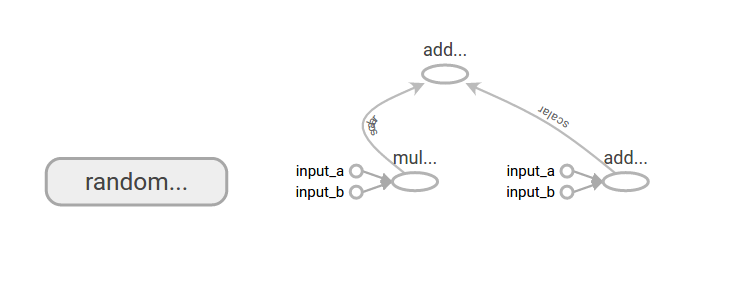